## Assignment A4: Sounds and Spectra

### John Mays (jkm100)

**Note**: This is my first time using Julia.  I wanted to familiarize myself with the tool.  Please forgive me for some of the finer details.

In [97]:
# Αα,Ββ,Γγ,Δδ,Εε,Ζζ,Ηη,Θθ,Ιι,Κκ,Λλ,Μμ,Νν,Ξξ,Οο,Ππ,Ρρ,Σσ/ς,Ττ,Υυ,Φφ,Χχ,Ψψ,Ωω
# dot syntax for broadcasting

In [104]:
using Pkg
# Pkg.add("Plots")
# I don't think I have to do this again
Pkg.add("WAV")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed WAV ──── v1.2.0
   Installed FileIO ─ v1.13.0
    Updating `~/.julia/environments/v1.7/Project.toml`
  [8149f6b0] + WAV v1.2.0
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [5789e2e9] + FileIO v1.13.0
  [8149f6b0] + WAV v1.2.0
Precompiling project...
  ✓ FileIO
  ✓ WAV
  2 dependencies successfully precompiled in 3 seconds (128 already precompiled)


In [12]:
purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

8-element Vector{String}:
 "#0a0612"
 "#392249"
 "#482980"
 "#673ab7"
 "#7a52aa"
 "#9779bd"
 "#b59fd0"
 "#d3c5e3"

### 1. Spectral Structure

#### 1a. Harmonics

In [3]:
function harmonic(t; f1=1, alist = 1, Φlist = 0)
    f = zeros(length(alist))
    for i = 1:length(alist)
        f[i] = i*f1
    end
    value = alist .* cos.(2 .* pi .* (f .* t .- Φlist))
    return sum(value)
end

harmonic (generic function with 1 method)

In [4]:
harmonic(0.9; f1=2, alist=[1, 0.5], Φlist = [0, 0])

-0.09549150281252694

In [5]:
function cosines(t; flist=1, alist=1, Φlist = 0)
    value = alist .* cos.(2 .* pi .* (flist .* t .- Φlist))
    return sum(value)
end

cosines (generic function with 1 method)

In [6]:
cosines(0.98; flist=[200, 205], alist=[1, 0.5], Φlist = [0, 0])

1.404508497187477

In [7]:
using Plots

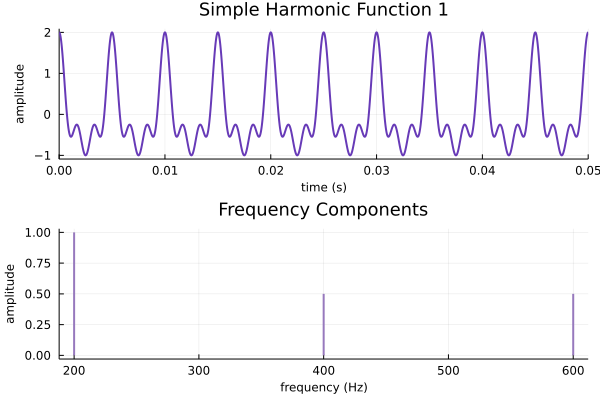

In [98]:
frequency_plot = 
sticks([200, 400, 600], [1,0.5,0.5],
    color=purples[6], 
    lw=2, 
    label = false, 
    title="Frequency Components",
    titlefontsize = 12,
    xlabel = "frequency (Hz)",
    ylabel = "amplitude"
)

amplitude_plot = 
plot(t -> harmonic(t, f1=200, alist=[1,0.5,0.5], Φlist = [0, 0, 0]), 0, 0.050, 
    color=purples[4], 
    lw=2, 
    label = false, 
    title="Simple Harmonic Function 1",
    titlefontsize = 12,
    xlims = (0, 0.05),
    xlabel = "time (s)",
    ylabel = "amplitude"
)

plot(amplitude_plot, frequency_plot, layout = (2,1), size = (600, 400), xguidefontsize = 8, yguidefontsize = 8)

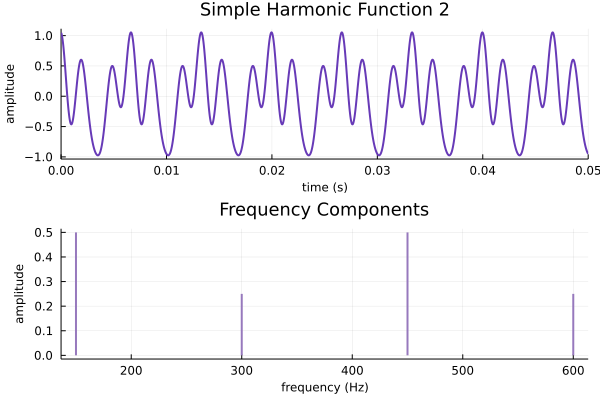

In [99]:
frequency_plot = 
sticks([150, 300, 450, 600], [0.5,0.25,0.5, 0.25],
    color=purples[6], 
    lw=2, 
    label = false, 
    title="Frequency Components",
    titlefontsize = 12,
    xlabel = "frequency (Hz)",
    ylabel = "amplitude"
)

amplitude_plot = 
plot(t -> harmonic(t, f1=150, alist=[0.5,0.25,0.5, 0.25], Φlist = [0, 0.6, 0, 0]), 0, 0.050,
    color=purples[4], 
    lw=2, 
    label = false, 
    title="Simple Harmonic Function 2",
    titlefontsize = 12,
    xlims = (0, 0.05),
    xlabel = "time (s)",
    ylabel = "amplitude"
)

plot(amplitude_plot, frequency_plot, layout = (2,1), size = (600, 400), xguidefontsize = 8, yguidefontsize = 8)

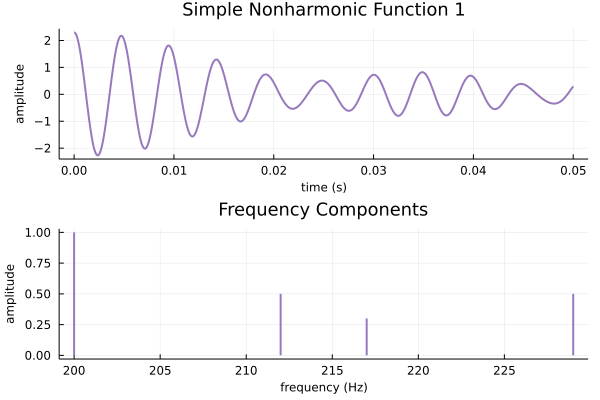

In [100]:
frequency_plot = 
sticks([200, 212, 229, 217], [1, 0.5, 0.5, 0.30],
    color=purples[6], 
    lw=2, 
    label = false, 
    title="Frequency Components",
    titlefontsize = 12,
    size = (400, 300),
    xlabel = "frequency (Hz)",
    ylabel = "amplitude"
)

amplitude_plot = 
plot(t -> cosines(t, flist=(200, 212, 229, 217), alist=[1, 0.5, 0.5, 0.30], Φlist = [0, 0, 0, 0]), 0, 0.050, 
    color=purples[6], 
    lw=2, 
    label = false, 
    title="Simple Nonharmonic Function 1",
    titlefontsize = 12,
    size = (400, 300),
    xlabel = "time (s)",
    ylabel = "amplitude"
)

plot(amplitude_plot, frequency_plot, layout = (2,1), size = (600, 400), xguidefontsize = 8, yguidefontsize = 8)

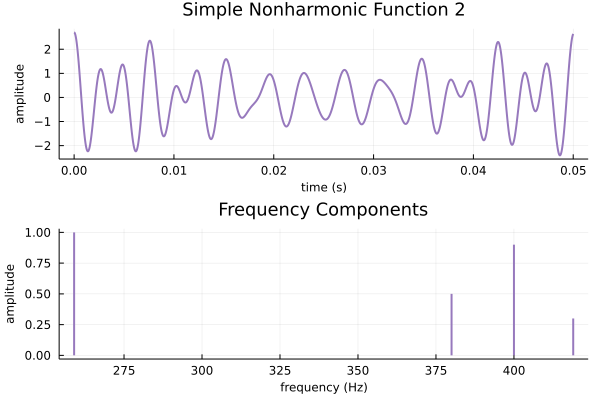

In [101]:
frequency_plot = 
sticks([400, 380, 259, 419], [0.9, 0.5, 1.0, 0.30],
    color=purples[6], 
    lw=2, 
    label = false, 
    title="Frequency Components",
    titlefontsize = 12,
    size = (400, 300),
    xlabel = "frequency (Hz)",
    ylabel = "amplitude"
)

amplitude_plot = 
plot(t -> cosines(t, flist=(400, 380, 259, 419), alist=[0.9, 0.5, 1.0, 0.30], Φlist = [0, 0, 0, 0]), 0, 0.050, 
    color=purples[6], 
    lw=2, 
    label = false, 
    title="Simple Nonharmonic Function 2",
    titlefontsize = 12,
    size = (400, 300),
    xlabel = "time (s)",
    ylabel = "amplitude"
)

plot(amplitude_plot, frequency_plot, layout = (2,1), size = (600, 400), xguidefontsize = 8, yguidefontsize = 8)

#### 1b. Pitch and Tone

In [102]:
using WAV

ArgumentError: ArgumentError: Package WAV not found in current path:
- Run `import Pkg; Pkg.add("WAV")` to install the WAV package.
